# Grade: /100 pts

# Assignment 06: Feature Selection and Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

# You're Still a Data Scientist!

Your models from the last assignment really impressed some in the management in your football club. Now that you have learned the art of regularization, your boss thinks you should do equally well with much less data. This will save a lot of money the next time around. This time you only get a data set with 3000 observations.

## Question 1: Preprocessing (5 pts)
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**. If you want to understand why this is, have a look at the Jupyter notebook (`Ridge_And_Dummycoding.ipynb`).  
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0
* visualize all variables of the first 50 observations of the Training data set as an image (see Lab06_followalong). You can also look at it as a data frame. How are the different variables scaled? Which variables have high and which ones have low values?    

To make sure that you get a good start - check the solutions from Assignment 4. And make sure you can apply these steps flexibly and quickly. **You will need it for the midterm!**

(50, 48)


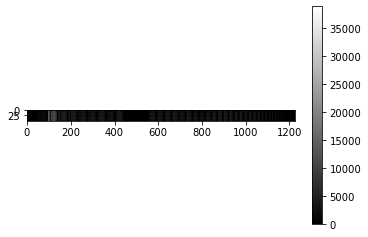

0     1      2     3     4     5     6     7     8     9     10    11    \
0   1.0  20.0  178.0  69.0  61.0  38.0  52.0  54.0  62.0  71.0   1.0   2.0   
1   1.0  21.0  182.0  77.0  80.0  66.0  64.0  76.0  49.0  64.0   1.0   4.0   
2   1.0  25.0  187.0  76.0  73.0  78.0  65.0  77.0  43.0  73.0   1.0   1.0   
3   1.0  21.0  175.0  77.0  89.0  72.0  66.0  78.0  33.0  63.0   1.0   3.0   
4   1.0  19.0  168.0  59.0  69.0  53.0  59.0  68.0  44.0  48.0   1.0   2.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   2.0  46.0  29.0  61.0  61.0  31.0  53.0  35.0  33.0  48.0  51.0  63.0   
1   2.0  63.0  64.0  66.0  66.0  55.0  77.0  60.0  54.0  65.0  77.0  83.0   
2   2.0  12.0  12.0  18.0  34.0  14.0  11.0   9.0  12.0  35.0  23.0  44.0   
3   4.0  73.0  74.0  49.0  69.0  65.0  80.0  57.0  55.0  55.0  75.0  90.0   
4   4.0  42.0  50.0  49.0  67.0  51.0  66.0  59.0  52.0  60.0  67.0  77.0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0  59.0  56.0  62.0  66.0  59.0  81.0  77.0  70.0  34.0  64.0  62.0  47.0   
1  78.0  84.0  67.0  62.0  75.0  69.0  73.0  70.0  66.0  34.0  52.0  67.0   
2  42.0  43.0  77.0  57.0  25.0  70.0  35.0  55.0  19.0  41.0  13.0  18.0   
3  89.0  78.0  67.0  78.0  74.0  55.0  66.0  64.0  71.0  59.0  24.0  72.0   
4  63.0  81.0  54.0  76.0  60.0  57.0  50.0  43.0  54.0  55.0  49.0  47.0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0  52.0  41.0  59.0  62.0  62.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
1  65.0  67.0  66.0  43.0  48.0   0.0   1.0   0.0   0.0   1.0   0.0   1.0   
2  45.0  27.0  52.0  14.0  15.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
3  68.0  62.0  68.0  35.0  33.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
4  65.0  57.0  60.0  42.0  40.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   

   48     49      50      51      52      53      54      55      56    \
0   1.0  400.0  3560.0  1380.0  1220.0   760.0  1040.0  1080.0  1240.0   
1   0.0  441.0  3822.0  1617.0  1680.0  1386.0  1344.0  1596.0  1029.0   
2   1.0  625.0  4675.0  1900.0  1825.0  1950.0  1625.0  1925.0  1075.0   
3   1.0  441.0  3675.0  1617.0  1869.0  1512.0  1386.0  1638.0   693.0   
4   1.0  361.0  3192.0  1121.0  1311.0  1007.0  1121.0  1292.0   836.0   

     57    58    59    60      61      62      63      64      65      66    \
0  1420.0  20.0  40.0  40.0   920.0   580.0  1220.0  1220.0   620.0  1060.0   
1  1344.0  21.0  84.0  42.0  1323.0  1344.0  1386.0  1386.0  1155.0  1617.0   
2  1825.0  25.0  25.0  50.0   300.0   300.0   450.0   850.0   350.0   275.0   
3  1323.0  21.0  63.0  84.0  1533.0  1554.0  1029.0  1449.0  1365.0  1680.0   
4   912.0  19.0  38.0  76.0   798.0   950.0   931.0  1273.0   969.0  1254.0   

     67      68      69      70      71      72      73      74      75    \
0   700.0   660.0   960.0  1020.0  1260.0  1180.0  1120.0  1240.0  1320.0   
1  1260.0  1134.0  1365.0  1617.0  1743.0  1638.0  1764.0  1407.0  1302.0   
2   225.0   300.0   875.0   575.0  1100.0  1050.0  1075.0  1925.0  1425.0   
3  1197.0  1155.0  1155.0  1575.0  1890.0  1869.0  1638.0  1407.0  1638.0   
4  1121.0   988.0  1140.0  1273.0  1463.0  1197.0  1539.0  1026.0  1444.0   

     76      77      78      79      80      81      82      83      84    \
0  1180.0  1620.0  1540.0  1400.0   680.0  1280.0  1240.0   940.0  1040.0   
1  1575.0  1449.0  1533.0  1470.0  1386.0   714.0  1092.0  1407.0  1365.0   
2   625.0  1750.0   875.0  1375.0   475.0  1025.0   325.0   450.0  1125.0   
3  1554.0  1155.0  1386.0  1344.0  1491.0  1239.0   504.0  1512.0  1428.0   
4  1140.0  1083.0   950.0   817.0  1026.0  1045.0   931.0   893.0  1235.0   

     85      86      87      88    89    90    91    92    93    94    95    \
0   820.0  1180.0  1240.0  1240.0   0.0  20.0   0.0   0.0  20.0   0.0   0.0   
1  1407.0  1386.0   903.0  1008.0   0.0  21.0   0.0   0.0  21.0   0.0  21.0   
2   675.0  1300.0   350.0   375.0   0.0  25.0   0.0   0.0  25.

In [2]:
# Your answer here
df = pd.read_csv('~/Desktop/CS4414/A6/footballer_small.csv')

# Drop the aformentioned columns
model_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')

# In order to get dummies, you can convert the categorical data to categorical type
# with a specific 
model_data['work_rate_att'] = pd.Categorical(model_data.work_rate_att, categories=['Low','Medium','High'])
model_data['work_rate_def'] = pd.Categorical(model_data.work_rate_def, categories=['Low','Medium','High'])
model_data['preferred_foot'] = pd.Categorical(model_data.preferred_foot, categories = ['Left','Right'])

model_data = pd.get_dummies(model_data, drop_first=False)

y = model_data.overall
X = model_data.drop('overall', axis = 'columns')
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=500, random_state=0)

# print(model_data_train)
# model_data_train=model_data_train.values
# model_data_train_50=model_data_train[:50]

X_train=Xtrain.values
Xtrain_50=X_train[:50]

print(Xtrain_50.shape)
# model_data_train=model_data_train.reshape(1,-1)
poly = sk.preprocessing.PolynomialFeatures(2)
X = poly.fit_transform(Xtrain_50)

plt.imshow(X, cmap='gray')
plt.colorbar()
plt.show()

XDF = pd.DataFrame(X)
XDF.head()

**Your written answer here**
The middle part of the computed data has very high value, this is bacause they are the multplication of two high value data attributes.

## Question 2: Standardization  (10 pts)
When using regularized regression models, the scaling of the different regressors can influence the results dramatically (see lectures). One simple solution is to standardize all features before estimating the model, so that no feature can dominate others due to differences in feature scales. 

a) Use the sklearn class `StandardScaler` to produce a z-scale version of your training data set. Again visualize the the first 50 observations an image. Compare to the plot that you got in Question 1. What do you observe? 

b) Plot a histogram of the second column (height_cm) of the non-standarized and standardized training set. What is the mean and variance of the standardized training set. 

c) Build a model `pipeline` that first standarizes all the features in the training set and then fits a `LinearRegression` model. 


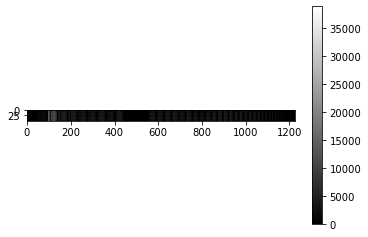

0     1      2     3     4     5     6     7     8     9     10    11    \
0   1.0  20.0  178.0  69.0  61.0  38.0  52.0  54.0  62.0  71.0   1.0   2.0   
1   1.0  21.0  182.0  77.0  80.0  66.0  64.0  76.0  49.0  64.0   1.0   4.0   
2   1.0  25.0  187.0  76.0  73.0  78.0  65.0  77.0  43.0  73.0   1.0   1.0   
3   1.0  21.0  175.0  77.0  89.0  72.0  66.0  78.0  33.0  63.0   1.0   3.0   
4   1.0  19.0  168.0  59.0  69.0  53.0  59.0  68.0  44.0  48.0   1.0   2.0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0   2.0  46.0  29.0  61.0  61.0  31.0  53.0  35.0  33.0  48.0  51.0  63.0   
1   2.0  63.0  64.0  66.0  66.0  55.0  77.0  60.0  54.0  65.0  77.0  83.0   
2   2.0  12.0  12.0  18.0  34.0  14.0  11.0   9.0  12.0  35.0  23.0  44.0   
3   4.0  73.0  74.0  49.0  69.0  65.0  80.0  57.0  55.0  55.0  75.0  90.0   
4   4.0  42.0  50.0  49.0  67.0  51.0  66.0  59.0  52.0  60.0  67.0  77.0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0  59.0  56.0  62.0  66.0  59.0  81.0  77.0  70.0  34.0  64.0  62.0  47.0   
1  78.0  84.0  67.0  62.0  75.0  69.0  73.0  70.0  66.0  34.0  52.0  67.0   
2  42.0  43.0  77.0  57.0  25.0  70.0  35.0  55.0  19.0  41.0  13.0  18.0   
3  89.0  78.0  67.0  78.0  74.0  55.0  66.0  64.0  71.0  59.0  24.0  72.0   
4  63.0  81.0  54.0  76.0  60.0  57.0  50.0  43.0  54.0  55.0  49.0  47.0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0  52.0  41.0  59.0  62.0  62.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
1  65.0  67.0  66.0  43.0  48.0   0.0   1.0   0.0   0.0   1.0   0.0   1.0   
2  45.0  27.0  52.0  14.0  15.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
3  68.0  62.0  68.0  35.0  33.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
4  65.0  57.0  60.0  42.0  40.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   

   48     49      50      51      52      53      54      55      56    \
0   1.0  400.0  3560.0  1380.0  1220.0   760.0  1040.0  1080.0  1240.0   
1   0.0  441.0  3822.0  1617.0  1680.0  1386.0  1344.0  1596.0  1029.0   
2   1.0  625.0  4675.0  1900.0  1825.0  1950.0  1625.0  1925.0  1075.0   
3   1.0  441.0  3675.0  1617.0  1869.0  1512.0  1386.0  1638.0   693.0   
4   1.0  361.0  3192.0  1121.0  1311.0  1007.0  1121.0  1292.0   836.0   

     57    58    59    60      61      62      63      64      65      66    \
0  1420.0  20.0  40.0  40.0   920.0   580.0  1220.0  1220.0   620.0  1060.0   
1  1344.0  21.0  84.0  42.0  1323.0  1344.0  1386.0  1386.0  1155.0  1617.0   
2  1825.0  25.0  25.0  50.0   300.0   300.0   450.0   850.0   350.0   275.0   
3  1323.0  21.0  63.0  84.0  1533.0  1554.0  1029.0  1449.0  1365.0  1680.0   
4   912.0  19.0  38.0  76.0   798.0   950.0   931.0  1273.0   969.0  1254.0   

     67      68      69      70      71      72      73      74      75    \
0   700.0   660.0   960.0  1020.0  1260.0  1180.0  1120.0  1240.0  1320.0   
1  1260.0  1134.0  1365.0  1617.0  1743.0  1638.0  1764.0  1407.0  1302.0   
2   225.0   300.0   875.0   575.0  1100.0  1050.0  1075.0  1925.0  1425.0   
3  1197.0  1155.0  1155.0  1575.0  1890.0  1869.0  1638.0  1407.0  1638.0   
4  1121.0   988.0  1140.0  1273.0  1463.0  1197.0  1539.0  1026.0  1444.0   

     76      77      78      79      80      81      82      83      84    \
0  1180.0  1620.0  1540.0  1400.0   680.0  1280.0  1240.0   940.0  1040.0   
1  1575.0  1449.0  1533.0  1470.0  1386.0   714.0  1092.0  1407.0  1365.0   
2   625.0  1750.0   875.0  1375.0   475.0  1025.0   325.0   450.0  1125.0   
3  1554.0  1155.0  1386.0  1344.0  1491.0  1239.0   504.0  1512.0  1428.0   
4  1140.0  1083.0   950.0   817.0  1026.0  1045.0   931.0   893.0  1235.0   

     85      86      87      88    89    90    91    92    93    94    95    \
0   820.0  1180.0  1240.0  1240.0   0.0  20.0   0.0   0.0  20.0   0.0   0.0   
1  1407.0  1386.0   903.0  1008.0   0.0  21.0   0.0   0.0  21.0   0.0  21.0   
2   675.0  1300.0   350.0   375.0   0.0  25.0   0.0   0.0  25.

In [3]:
# Part a answer
std = sk.preprocessing.StandardScaler()
Xtrain_standardized_50 = std.fit_transform(Xtrain_50)
plt.imshow(X, cmap='gray')
plt.colorbar()
plt.show()
XDF = pd.DataFrame(X)
XDF.head()

**Written answer here**
In my program the graph is shrinked and I cant see a thing, but from the observation of the dataframe I can conclued that the values are much more lower than the non-standarized ones, this is because they are rendered in a way that the high values are not extremely high and the low values are not extremely low

[178. 182. 187. 175. 168. 174. 182. 178. 187. 189. 196. 182. 185. 170.
 180. 180. 173. 191. 182. 175. 175. 170. 180. 189. 190. 188. 189. 178.
 186. 177. 197. 186. 190. 184. 173. 173. 188. 172. 191. 177. 194. 173.
 169. 184. 174. 176. 179. 186. 180. 182.]
[-0.90450957  0.15031209  0.01845938  0.15031209 -2.22303664 -1.56377311
  1.07328104 -0.77265686 -0.11339333  1.46883916 -0.24524604  0.28216479
  0.80957562 -0.77265686 -0.11339333 -0.50895145 -0.64080416  1.33698645
  0.01845938 -0.64080416 -0.37709874 -0.90450957 -1.16821499  1.07328104
  1.07328104  1.86439728 -0.11339333 -1.56377311  0.4140175  -0.37709874
  1.20513374  0.54587021  2.12810269 -0.37709874 -1.4319204  -0.77265686
  1.73254457 -1.03636228  1.99624999 -0.11339333  1.73254457 -0.90450957
 -0.11339333 -0.24524604  0.54587021  0.01845938 -1.03636228 -0.11339333
  0.01845938 -0.50895145]
7.327471962526034e-17 181.28 1.0 7.313111512892443


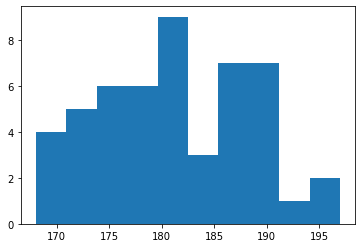

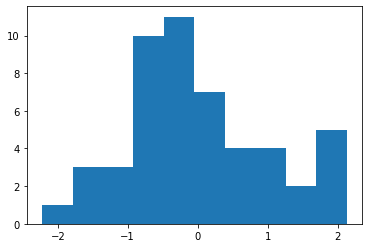

In [55]:
# b) Plot historgram 
height_non_standarized = Xtrain_50[:,1]
print(height_non_standarized)
height_standarized = Xtrain_standardized_50[:,2]
print(height_standarized)
plot1= plt.figure(1)
plt.hist(height_non_standarized)
plot2= plt.figure(2)
plt.hist(height_standarized)
mean_stded = np.mean(height_standarized)
std_stded = np.std(height_standarized)
mean_unstded = np.mean(height_non_standarized)
std_unstded = np.std(height_non_standarized)
print(mean_stded,mean_unstded,std_stded,std_unstded)
plt.show()

**Written answer here**
standarized mean:7.327471962526034e-17
not standarized mean:181.28 
standarized standard deviation:1.0 
not standarized standard deviation:7.313111512892443

In [5]:
# c: Build pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

## Question 3: Comparing different complex features (10 pts)
In this task, we will first consider a model that includes all the variables in the data AND all quadratic terms (i.e. each features to the power of two, and the products (interactions) between all possible pairs of features. 

a) Generate a design matrix for the model. You can use sklearn's `PolynomialFeatures` to do the job. Because sklearn's linear models have the option to fit the intercept, internally, set the `include_bias` option to `False`. 
* How many linear terms are in each of the new feature set? for 49 features, there will be 0 linear terms
* How many squared terms are in each of the new feature set? for 49 features, there will be 49^2/2 linear terms
* How many interaction terms are in each of the new feature set? for 49 features, there will be 49^2/2 linear terms
Give an example of one of the interaction terms. 
height*weight

b) Now generate 3 more models / design matrices. Again it should include all quadratic terms and 2-way interactions - but each model should drop one of the features
* Second Model: Drop `standing_tackle`
* Third Model: Drop `composure`
* Fourth model: Drop `marking`

Hint: For these models, create the design matrix without the aforementioned features and then apply polynomial expansion to the remaing features. 


In [7]:
# a) Make the new expanded design matrix 
poly = sk.preprocessing.PolynomialFeatures(2,include_bias = False)
X = poly.fit_transform(X_train)
pd.DataFrame(X_train)

0      1     2     3     4     5     6     7     8    9    10   11  \
0     20.0  178.0  69.0  61.0  38.0  52.0  54.0  62.0  71.0  1.0  2.0  2.0   
1     21.0  182.0  77.0  80.0  66.0  64.0  76.0  49.0  64.0  1.0  4.0  2.0   
2     25.0  187.0  76.0  73.0  78.0  65.0  77.0  43.0  73.0  1.0  1.0  2.0   
3     21.0  175.0  77.0  89.0  72.0  66.0  78.0  33.0  63.0  1.0  3.0  4.0   
4     19.0  168.0  59.0  69.0  53.0  59.0  68.0  44.0  48.0  1.0  2.0  4.0   
...    ...    ...   ...   ...   ...   ...   ...   ...   ...  ...  ...  ...   
2495  27.0  176.0  76.0  89.0  60.0  55.0  68.0  58.0  61.0  1.0  2.0  2.0   
2496  29.0  188.0  80.0  74.0  72.0  71.0  75.0  60.0  71.0  1.0  1.0  3.0   
2497  32.0  190.0  78.0  67.0  70.0  69.0  63.0  51.0  64.0  1.0  1.0  3.0   
2498  32.0  180.0  72.0  82.0  58.0  75.0  77.0  78.0  77.0  3.0  3.0  3.0   
2499  18.0  188.0  72.0  64.0  52.0  34.0  49.0  25.0  59.0  1.0  2.0  3.0   

        12    13    14    15    16    17    18    19    20    21    22    23  \
0     46.0  29.0  61.0  61.0  31.0  53.0  35.0  33.0  48.0  51.0  63.0  59.0   
1     63.0  64.0  66.0  66.0  55.0  77.0  60.0  54.0  65.0  77.0  83.0  78.0   
2     12.0  12.0  18.0  34.0  14.0  11.0   9.0  12.0  35.0  23.0  44.0  42.0   
3     73.0  74.0  49.0  69.0  65.0  80.0  57.0  55.0  55.0  75.0  90.0  89.0   
4     42.0  50.0  49.0  67.0  51.0  66.0  59.0  52.0  60.0  67.0  77.0  63.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2495  58.0  65.0  56.0  60.0  51.0  68.0  39.0  34.0  40.0  66.0  88.0  89.0   
2496  11.0  16.0  14.0  48.0  15.0  15.0  12.0  15.0  33.0  24.0  59.0  60.0   
2497  19.0  12.0  22.0  46.0  16.0  18.0  19.0  11.0  43.0  30.0  47.0  55.0   
2498  83.0  54.0  59.0  77.0  49.0  77.0  80.0  59.0  66.0  79.0  76.0  87.0   
2499  24.0  55.0  59.0  39.0  46.0  48.0  26.0  25.0  28.0  51.0  67.0  61.0   

        24    25    26    27    28    29    30    31    32    33    34    35  \
0     56.0  62.0  66.0  59.0  81.0  77.0  70.0  34.0  64.0  62.0  47.0  52.0   
1     84.0  67.0  62.0  75.0  69.0  73.0  70.0  66.0  34.0  52.0  67.0  65.0   
2     43.0  77.0  57.0  25.0  70.0  35.0  55.0  19.0  41.0  13.0  18.0  45.0   
3     78.0  67.0  78.0  74.0  55.0  66.0  64.0  71.0  59.0  24.0  72.0  68.0   
4     81.0  54.0  76.0  60.0  57.0  50.0  43.0  54.0  55.0  49.0  47.0  65.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2495  71.0  66.0  69.0  62.0  58.0  70.0  70.0  50.0  26.0  59.0  64.0  65.0   
2496  42.0  76.0  44.0  32.0  75.0  31.0  67.0  12.0  29.0  16.0  12.0  57.0   
2497  49.0  61.0  50.0  20.0  58.0  38.0  65.0  16.0  39.0  23.0  12.0  31.0   
2498  75.0  82.0  62.0  68.0  68.0  82.0  74.0  53.0  78.0  76.0  68.0  72.0   
2499  52.0  43.0  56.0  58.0  62.0  60.0  63.0  42.0  49.0  21.0  50.0  43.0   

        36    37    38    39   40   41   42   43   44   45   46   47  
0     41.0  59.0  62.0  62.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
1     67.0  66.0  43.0  48.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  
2     27.0  52.0  14.0  15.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
3     62.0  68.0  35.0  33.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
4     57.0  60.0  42.0  40.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  
...    ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
2495  51.0  63.0  59.0  58.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  
2496  43.0  68.0  19.0  11.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
2497  41.0  48.0  14.0  25.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
2498  66.0  74.0  80.0  82.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
2499  54.0  48.0  22.0  22.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  

[2500 rows x 48 columns]

**Written answer here**


In [9]:
# Make design matrices without one of the features
model_data_train_1 = np.delete(X_train,39,1)
model_data_train_2 = np.delete(X_train,38,1)
model_data_train_3 = np.delete(X_train,37,1)
X1 = poly.fit_transform(model_data_train_1)
X2 = poly.fit_transform(model_data_train_2)
X3 = poly.fit_transform(model_data_train_3)

## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to use the pipeline created in question 2 and apply it to each of the models in question 3. Use 10-fold cross validation to report the validation error on the models using mean squared error as the metric. <br>
Show all the steps of the process and compare and analyze the results using the validation error reported. For this first step in the backwards search, which feature would you drop? 

In [56]:
# Your code here
print(cross_val_score(pipe, X1, ytrain, cv = 10,scoring = 'neg_mean_squared_error').mean())
print(cross_val_score(pipe, X2, ytrain, cv = 10,scoring = 'neg_mean_squared_error').mean())
print(cross_val_score(pipe, X3, ytrain, cv = 10,scoring = 'neg_mean_squared_error').mean())

-2.753835750773214
-2.6968229177738663
-2.805989172740906


**Written answer here**  
 I would drop marking because it causes the most error.

## Question 5: Applying Ridge Regression (10 pts)
Build a pipeline that performs scaling and fits the ridge regression on the data that includes the polynomial expansion of all the features. The ridge parameter ($\lambda$ or `alpha` in sklearn) should be set to 0.5. Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [20]:
# Your code here
pipe2 = Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge(alpha=0.5))])
X_train_ridge = poly.fit_transform(X_train)
print(cross_val_score(pipe2, X_train_ridge, ytrain, cv = 10,scoring = 'neg_mean_squared_error').mean())

-1.6479594283459882


## Question 6: Tune the Ridge coefficient for the 2nd-order model (15 pts)
Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. 

For each setting of lambda, calculate the training error when fitting the regularized model to the entire trainign data set, and the prediction error by studying the performance on the left-out part using 10-fold cross-validation. (*Note this calculation can take a bit, be patient*)

Plot the mean squared training error and mean squared validation error as a function of $\log(\lambda)$. 

Note: Although you can ultimately use `GridSearchCV` from sklearn, in this task you need to program a for-loop interating over all the levels of $\lambda$.  

### Questions: 

What is the best regularization parameter? 

Why does the validation error increase as $\lambda \rightarrow 0$, while the training error decreases from the optimal value?  Why does both the training and the validation error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off and model complexity.


lambda = exp -8 is -2.827907859386658
lambda = exp -7 is -2.6882848969570294
lambda = exp -6 is -2.5095836713024733
lambda = exp -5 is -2.333291883654139
lambda = exp -4 is -2.1745263330366553
lambda = exp -3 is -2.0284519203723894
lambda = exp -2 is -1.8877404821828798
lambda = exp -1 is -1.7529404788031975
lambda = exp 0 is -1.637087330791962
lambda = exp 1 is -1.5546811509937837
lambda = exp 2 is -1.5178393887097967
lambda = exp 3 is -1.5371871435342583
lambda = exp 4 is -1.6427661939884395
lambda = exp 5 is -1.9149139651666194
lambda = exp 6 is -2.484031302436745


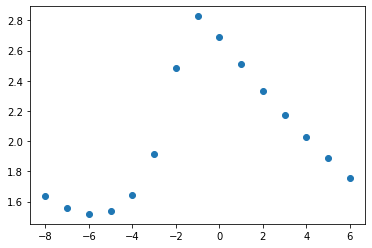

In [35]:
# Your code here
lam = np.exp(np.linspace(-8,6,15))
mse = np.zeros(15)
for x in range(-8,7):
    pipe3 = Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge(alpha=np.exp(x)))])
    cv_scores = cross_val_score(pipe3, X_train_ridge, ytrain, cv = 10,scoring = 'neg_mean_squared_error').mean()
    print("lambda = exp",x,"is",cv_scores)
    mse[x]=-cv_scores.mean()
plt.scatter(np.log(lam),mse)

**Written answer here**
The best regularization parameter is when lambda = exp(-6)

as ùúÜ‚Üí0, the training error decreases and test error increases due to overfitting.
when  ùúÜ‚Üí‚àû, the training error and test error both increases due to the complexity of model makes the fit becomes vert variable.

## Question 7: Test error  (10 pts)
Now fit the model using ridge regression, using the lambda-value that you determined works best (in terms of crossvalidated mse) from Question 6. Fit the model on the whole training set. 

Report the mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem (remember assignment 5). 

Generalization Error:  6.451071614571658
Confidence interval:  [5.55107498 7.35106825]


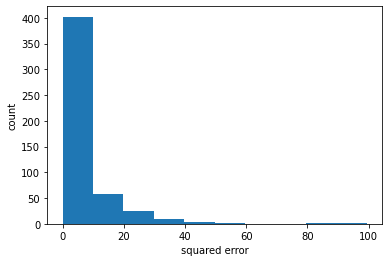

In [42]:
# Your code here
ridge = Ridge(alpha=np.exp(-6))
ridge.fit(Xtrain, ytrain)
ypred = ridge.predict(Xtest)
test_errors = np.power(ytest - ypred, 2)
generalization_error = test_errors.mean()

test_ci = generalization_error + 1.96 * np.std(test_errors) / np.sqrt(len(test_errors)) * np.array([-1, 1])

plt.hist(test_errors)
plt.xlabel('squared error')
plt.ylabel('count')

print('Generalization Error: ',generalization_error)
print('Confidence interval: ', test_ci)
# pipe4 = Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge(alpha=np.exp(-6)))])
# cv_scores = cross_val_score(pipe4, X_train_ridge, ytrain, cv = 10,scoring = 'neg_mean_squared_error').mean()
# print(cv_scores)

## Question 8: Lasso Regression (10 pts)
That's great! You can achieve a really good prediction accuracy with much less data than in Week 5. Impressive! 

Now the problem is that the model is really hard to interpret and explain to clients- the importance of each feature is not easily apparent. So let's build a simpler model, which is only based on the first nine features:
* age
* height_cm
* weight_kg 
* pac: ???  
* sho: shooting 
* pas: passing 
* dri: dribble 
* def: defense
* phy: Physiological VO2 max

Build a design matrix using only these nine features. Standardize the design matrix using the standard scalar. 
Then use `sklearn.linear_model.lasso_path` to create a plot of the regression coefficients against the log-regularization parameter (see `Lab06_followalong`). Note that it is standard practice to plot on the x-axis the negative log-lambda values, such that the high regularization (and hence the simpler models) are on the left. 

Which of the 9 variables drops out of the predicitive model first? Which one is retained for the longest time? 

minmum regularization parameter : 0.022393140050754903
maximum regularization parameter : 4.47862801015098


/Users/DavidShang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass eps=0.005 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


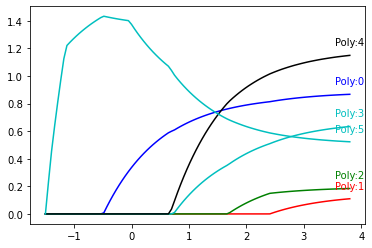

In [52]:
# Make a new, reduced design matrix 
eps = 5e-3 # The smaller eps, the longer the path  
model_data_lasso = df[["age","height_cm","weight_kg","pac", "sho","pas","dri", "def","phy"]]
y_lasso = y
model_data_lasso_standardized = std.fit_transform(model_data_lasso)
# Create a lasso path 
lambda_lasso, coefs_lasso, _ = sk.linear_model.lasso_path(
    model_data_lasso_standardized, y, eps, n_alphas=100, alphas= None, fit_intercept=False)

print(f"minmum regularization parameter : {np.amin(lambda_lasso)}")
print(f"maximum regularization parameter : {np.amax(lambda_lasso)}")
# Plot the lasso path
colors = ['b', 'r', 'g', 'c', 'k','c']
neg_log_lambda = -np.log(lambda_lasso)
for i in range(6):
    l1 = plt.plot(neg_log_lambda, coefs_lasso[i,], c=colors[i])
    label = f'Poly:{i}'
    plt.annotate(label, # this is the text
                 (neg_log_lambda[-1],coefs_lasso[i,-1]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 color = colors[i]) # horizontal alignment can be left, right or center
                

**Written answer here**

## Question 9: Tuning the lasso coefficient 
We now want to find a model that is both simple (explainable), but at the same time yields still relatively decent predictions. To assess this, vary the regularization constant of the lasso model between exp(2) end exp(-3.5). That is, vary negative log lambda between -2 and 3.5 in even steps. 
Plot the crossvalidation error (mean squared error) against negative-log-lambda of the model. 

Hint: You can either program a for-loop as in Question 6, or use the function `GridSearchCV`. 

What is the simplest model that still gives you a expected validation error of below 15? 
If you wanted the best validation error, what $\lambda$ would you need to use?

In [ ]:
# Your code here


**Written answer here**

## Question  10: Lasso vs. Ridge
In this quesiton, we will compare Ridge regression and Lasso solutions on the model defined in Question 8. Make sure you are using a standardized design matrix for this task. 

Fit the model using Ridge (L2- regularization, $\lambda = exp(-3)$) and Lasso (L1-regularization, $\lambda = exp(-0.5)$. Then print out the regression coefficients for each of the nine features in the design matrix. 

Based on the coefficients, which one is the most important feature in the Ridge vs. Lasso solution? How many features are contributing to the prediction for each solution? How can this difference be explained? 


In [ ]:
# Your code here
model_data_lasso = df[["age","height_cm","weight_kg","pac", "sho","pas","dri", "def","phy"]]
model_data_ridge = df[["age","height_cm","weight_kg","pac", "sho","pas","dri", "def","phy"]]
y_lasso = y
y_ridge = y
model_data_lasso_standardized = std.fit_transform(model_data_lasso)
model_data_ridge_standardized = std.fit_transform(model_data_ridge)
ridge = Ridge(alpha=np.exp(-3))
lasso = Lasso(alpha=np.exp(-0.5))
lasso.fit(model_data_lasso_standardized,y_lasso)
ridge.fit(model_data_ridge_standardized,y_ridge)


**Written answer here**